## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_InitialDoE_Feb.csv', firstRow=114, lastRow=120)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_060223_S115-120.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse water addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=70s and ended at t=492s; mass=45.12865g
This equals a volume of 45.219m; expected was 45.305mL; error is 0.19%


## Analyise surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


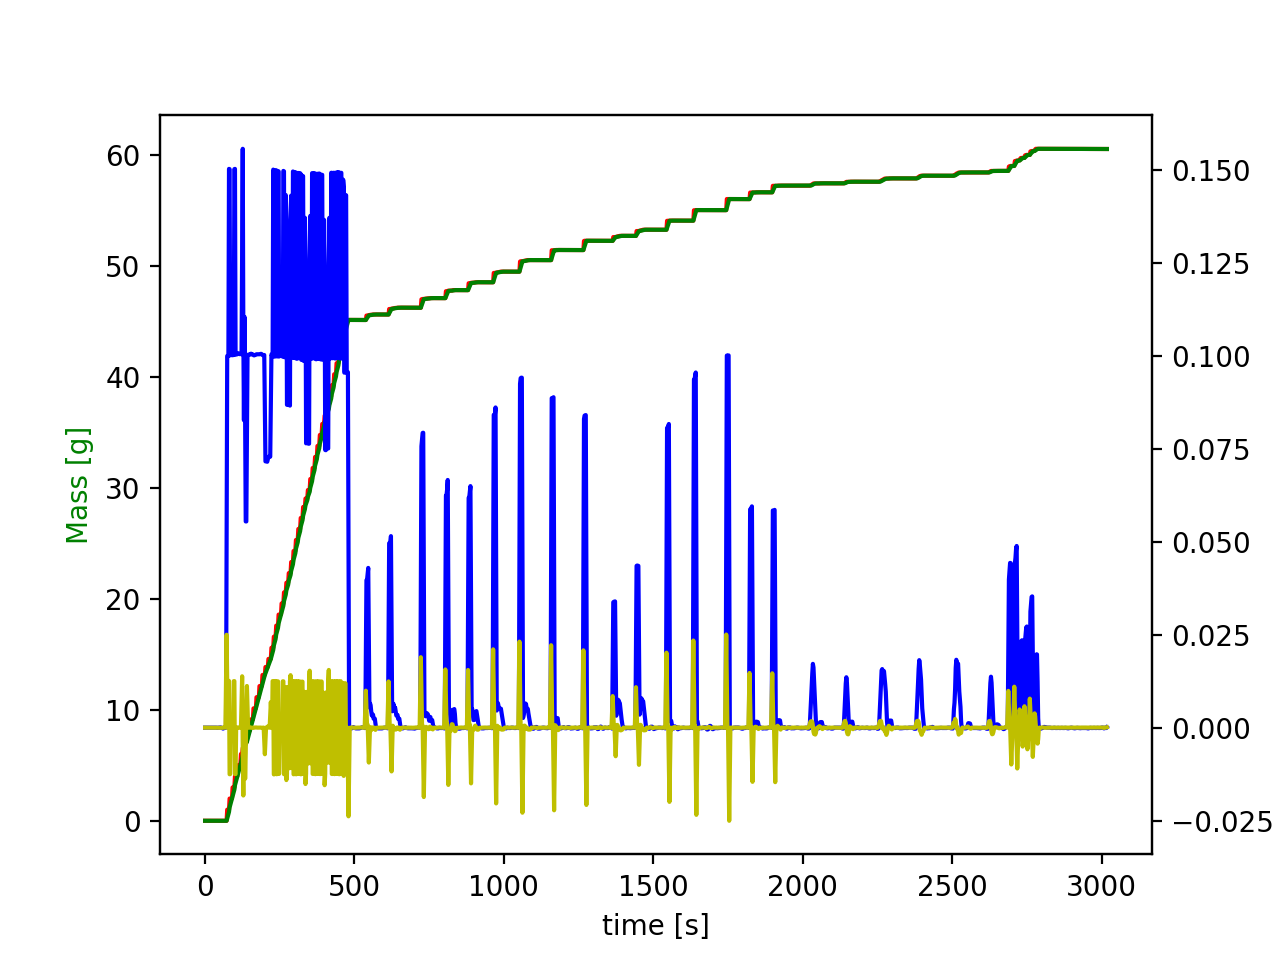

Addition of 0.496g Plantacare 818 detected from 534s to 576s - expected volume = 0.565mL and actual volume = 0.456mL (resulting error is 19.333%)
Addition of 0.618g Plantacare 818 detected from 610s to 658s - expected volume = 0.565mL and actual volume = 0.567mL (resulting error is 0.439%)
Addition of 0.87g Plantacare 2000 detected from 718s to 768s - expected volume = 0.933mL and actual volume = 0.804mL (resulting error is 13.871%)
Addition of 0.723g Plantacare 2000 detected from 800s to 844s - expected volume = 0.6mL and actual volume = 0.667mL (resulting error is 11.262%)
Addition of 0.713g Plantacare 2000 detected from 876s to 920s - expected volume = 0.6mL and actual volume = 0.658mL (resulting error is 9.723%)
Addition of 0.957g Plantacare 2000 detected from 960s to 1004s - expected volume = 0.84mL and actual volume = 0.884mL (resulting error is 5.198%)
Addition of 1.045g Plantacare 2000 detected from 1048s to 1094s - expected volume = 0.908mL and actual volume = 0.959mL (resulti

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


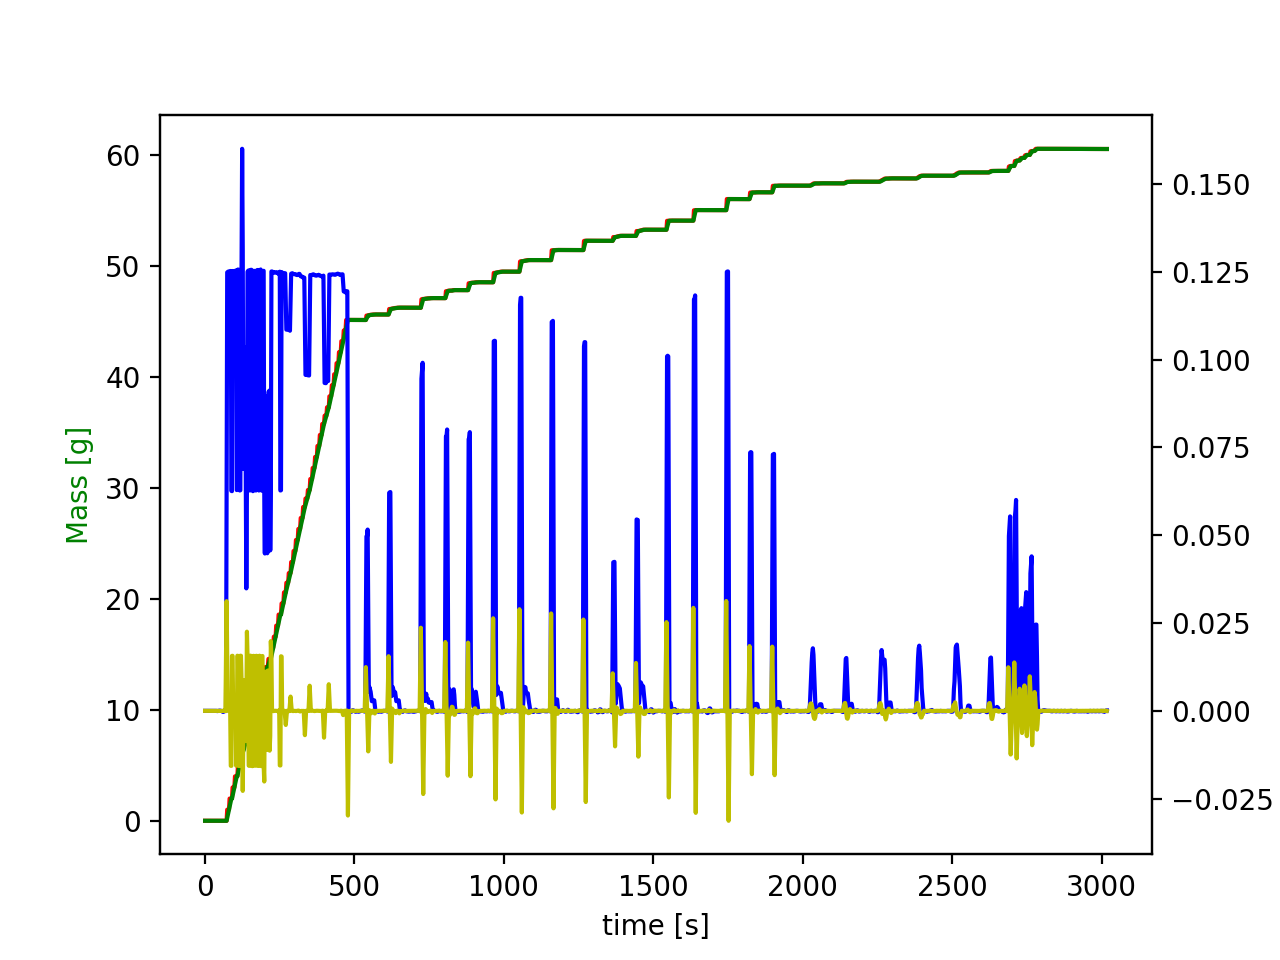

Addition of 0.216g Luviquat Excellence detected from 2020s to 2070s - expected volume = 0.218mL and actual volume = 0.196mL (resulting error is 10.104%)
Addition of 0.148g Luviquat Excellence detected from 2134s to 2172s - expected volume = 0.126mL and actual volume = 0.133mL (resulting error is 5.625%)
Addition of 0.305g Luviquat Excellence detected from 2252s to 2302s - expected volume = 0.274mL and actual volume = 0.278mL (resulting error is 1.583%)
Addition of 0.248g Luviquat Excellence detected from 2376s to 2408s - expected volume = 0.218mL and actual volume = 0.226mL (resulting error is 3.281%)
Addition of 0.302g Luviquat Excellence detected from 2500s to 2564s - expected volume = 0.264mL and actual volume = 0.275mL (resulting error is 4.095%)
Addition of 0.134g Luviquat Excellence detected from 2618s to 2642s - expected volume = 0.127mL and actual volume = 0.122mL (resulting error is 4.018%)


In [4]:
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=6, mergeSens=12, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.0011250000000000001 g/s^2


<IPython.core.display.Javascript object>


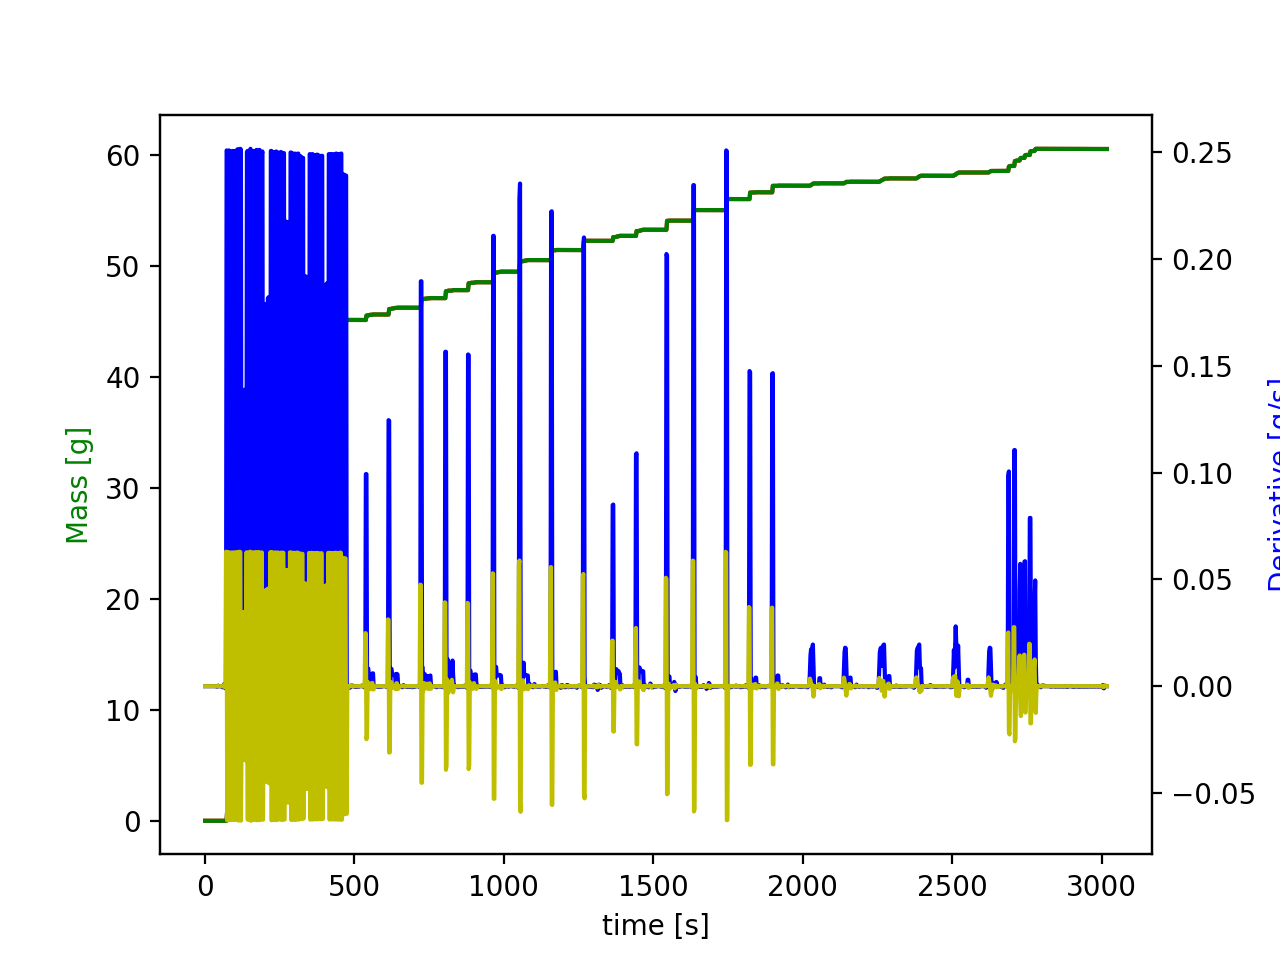

Addition of 0.444g Arlypon TT detected from 2684s to 2700s - expected volume = 0.502mL and actual volume = 0.464mL (resulting error is 7.5%)
Addition of 0.491g Arlypon TT detected from 2704s to 2720s - expected volume = 0.466mL and actual volume = 0.508mL (resulting error is 9.111%)
Addition of 0.237g Arlypon TT detected from 2722s to 2736s - expected volume = 0.168mL and actual volume = 0.249mL (resulting error is 48.125%)
Addition of 0.272g Arlypon TT detected from 2738s to 2754s - expected volume = 0.241mL and actual volume = 0.285mL (resulting error is 18.261%)
Addition of 0.35g Arlypon TT detected from 2756s to 2772s - expected volume = 0.325mL and actual volume = 0.368mL (resulting error is 13.065%)
Addition of 0.198g Arlypon TT detected from 2772s to 2786s - expected volume = 0.146mL and actual volume = 0.206mL (resulting error is 41.429%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=9, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_S115-S120.csv', index=False)
actualMassFractions

,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
114,115.0,0.0,0.0,0.0,11.203791,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.052027,0.0,2.170244,0.0,0.0,0.0,0.0,4.466226
115,116.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.096470,0.0,11.977585,0.0,1.453698,0.0,0.0,0.0,0.0,4.826817
116,117.0,0.0,0.0,0.0,0.000000,8.637145,9.053166,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3.025831,0.0,0.0,0.0,0.0,2.353148
117,118.0,0.0,0.0,0.0,0.000000,13.909598,0.000000,8.124584,0.000000,0.000000,0.0,0.000000,0.0,2.400335,0.0,0.0,0.0,0.0,2.633953
118,119.0,0.0,0.0,0.0,0.000000,9.443395,0.000000,0.000000,9.899141,0.000000,0.0,0.000000,0.0,2.977880,0.0,0.0,0.0,0.0,3.457547
119,120.0,0.0,0.0,0.0,0.000000,10.184100,0.000000,0.000000,0.000000,9.285732,0.0,0.000000,0.0,1.309308,0.0,0.0,0.0,0.0,1.929250
